<i>Updated 21/Nov/2021</i> by Yoshihisa Nitta &nbsp; <img src="https://nw.tsuda.ac.jp/icons/nitta-email.gif" />


# Analysis of Variational Auto Encoder for CelebA dataset with Tensorflow 2 on Google Colab

Train Variational Auto Encoder further on CelebA dataset.
It is assumed that it is in the state after executing VAE_CelebA_Train2.ipynb.

## CelebA データセットに対する Variational Auto Encoder をGoogle Colab 上の Tensorflow 2 で解析する

CelebA データセットに対して変分オートエンコーダを学習させた結果を解析する。
VAE_CelebA_Train2.ipynb を実行した後の状態であることを前提としている。

In [1]:
#! pip install tensorflow==2.7.0

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)

2.7.0


# Check the Google Colab runtime environment

## Google Colab 実行環境を調べる

In [3]:
! nvidia-smi
! cat /proc/cpuinfo
! cat /etc/issue
! free -h

Mon Nov 22 05:52:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive from Google Colab

## Google Colab から GoogleDrive をマウントする

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! ls /content/drive

MyDrive  Shareddrives


# Download source file from Google Drive or nw.tsuda.ac.jp

Download from nw.tsuda.ac.jp above only if the specifications of Google Drive change and you cannot download from Google Drive.

# Google Drive または nw.tsuda.ac.jp からファイルをダウンロードする

Google Drive の仕様が変わってダウンロードができない場合にのみ、上の nw.tsuda.ac.jp からダウンロードすること。

In [6]:
# Download source file
nw_path = './nw'
! rm -rf {nw_path}
! mkdir -p {nw_path}

if True:   # from Google Drive
    url_model =  'https://drive.google.com/uc?id=1ZCihR7JkMOity4wCr66ZCp-3ZOlfwwo3'
    ! (cd {nw_path}; gdown {url_model})
else:      # from nw.tsuda.ac.jp
    URL_NW = 'https://nw.tsuda.ac.jp/lec/GoogleColab/pub'
    url_model = f'{URL_NW}/models/VariationalAutoEncoder.py'
    ! wget -nd {url_model} -P {nw_path}

Downloading...
From: https://drive.google.com/uc?id=1ZCihR7JkMOity4wCr66ZCp-3ZOlfwwo3
To: /content/nw/VariationalAutoEncoder.py
100% 18.7k/18.7k [00:00<00:00, 16.5MB/s]


In [7]:
! cat {nw_path}/VariationalAutoEncoder.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle
import datetime

class Sampling(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        mu, log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=tf.keras.backend.shape(mu), mean=0., stddev=1.)
        return mu + tf.keras.backend.exp(log_var / 2) * epsilon


class VAEModel(tf.keras.models.Model):
    def __init__(self, encoder, decoder, r_loss_factor, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.r_loss_factor = r_loss_factor


    @tf.function
    def loss_fn(self, x):
        z_mean, z_log_var, z = self.encoder(x)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            tf.square(x - reconstruction), axis=[1,2,3]
        ) * self.r_loss_factor
        kl_loss = tf.reduce_sum(
   

# Preparing CelebA dataset

Official WWW of CelebA dataset:
<a href="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
</a>

Google Drive of CelebA dataset:
<a href="https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg">
https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
</a>

img_align_celeba.zip mirrored on my Google Drive:    
<a href="https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx">
https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
</a>

## CelebA データセットを用意する

CelebA データセットの公式ページ:
<a href="https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">
https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
</a>

CelebA データセットのGoogle Drive:
<a href="https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg">
https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
</a>

自分の Google Drive 上にミラーした img_align_celeba.zip:    
<a href="https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx">
https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
</a>

In [8]:
# Download img_align_celeba.zip from GoogleDrive

MIRRORED_URL = 'https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx'

! gdown {MIRRORED_URL}

Downloading...
From: https://drive.google.com/uc?id=1LFKeoI-hb96jlV0K10dO1o04iQPBoFdx
To: /content/img_align_celeba.zip
100% 1.44G/1.44G [00:22<00:00, 64.1MB/s]


In [9]:
! ls -l

total 1409676
drwx------ 6 root root       4096 Nov 22 05:53 drive
-rw-r--r-- 1 root root 1443490838 Nov 22 05:54 img_align_celeba.zip
drwxr-xr-x 2 root root       4096 Nov 22 05:53 nw
drwxr-xr-x 1 root root       4096 Nov 18 14:36 sample_data


In [10]:
DATA_DIR = 'data'
DATA_SUBDIR = 'img_align_celeba'

In [11]:
! rm -rf {DATA_DIR}
! unzip -d {DATA_DIR} -q {DATA_SUBDIR}.zip

In [12]:
! ls -l {DATA_DIR}/{DATA_SUBDIR} | head
! ls {DATA_DIR}/{DATA_SUBDIR} | wc

total 1737936
-rw-r--r-- 1 root root 11440 Sep 28  2015 000001.jpg
-rw-r--r-- 1 root root  7448 Sep 28  2015 000002.jpg
-rw-r--r-- 1 root root  4253 Sep 28  2015 000003.jpg
-rw-r--r-- 1 root root 10747 Sep 28  2015 000004.jpg
-rw-r--r-- 1 root root  6351 Sep 28  2015 000005.jpg
-rw-r--r-- 1 root root  8073 Sep 28  2015 000006.jpg
-rw-r--r-- 1 root root  8203 Sep 28  2015 000007.jpg
-rw-r--r-- 1 root root  7725 Sep 28  2015 000008.jpg
-rw-r--r-- 1 root root  8641 Sep 28  2015 000009.jpg
 202599  202599 2228589


# Check the CelebA dataset

## CelebA データセットを確認する

In [13]:
# paths to all the image files.

import os
import glob
import numpy as np

all_file_paths = np.array(glob.glob(os.path.join(DATA_DIR, DATA_SUBDIR, '*.jpg')))
n_all_images = len(all_file_paths)

print(n_all_images)

202599


In [14]:
# slect some image files.

n_to_show = 10
selected_indices = np.random.choice(range(n_all_images), n_to_show)
selected_paths = all_file_paths[selected_indices]

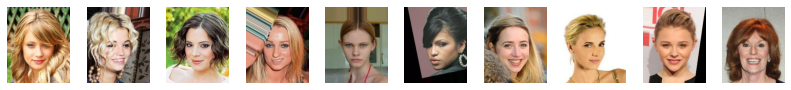

In [15]:
# Display some images.
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, n_to_show, figsize=(1.4 * n_to_show, 1.4))
for i, path in enumerate(selected_paths):
    img = tf.keras.preprocessing.image.load_img(path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

# Separate image files for train and test

## 画像ファイルを学習用とテスト用に分割する

In [16]:
TRAIN_DATA_DIR = 'train_data'
TEST_DATA_DIR = 'test_data'

In [17]:
import os

split = 0.05

indices = np.arange(n_all_images)
np.random.shuffle(indices)
train_indices = indices[: -int(n_all_images * split)]
test_indices = indices[-int(n_all_images * split):]

! rm -rf {TRAIN_DATA_DIR} {TEST_DATA_DIR}

dst=f'{TRAIN_DATA_DIR}/celeba'
if not os.path.exists(dst):
    os.makedirs(dst)
for idx in train_indices:
    path = all_file_paths[idx]
    dpath, fname = os.path.split(path)
    os.symlink(f'../../{path}', f'{dst}/{fname}')

dst=f'{TEST_DATA_DIR}/celeba'
if not os.path.exists(dst):
    os.makedirs(dst)
for idx in test_indices:
    path = all_file_paths[idx]
    dpath, fname = os.path.split(path)
    os.symlink(f'../../{path}', f'{dst}/{fname}')

# Prepare ImageDataGenerator

<code>flow_from_directory()</code> requires to specify the parent directory of the directory where the image files are located.

## ImageDataGenerator を用意する

<code>flow_from_directory()</code> では image files があるディレクトリの親ディレクトリを指定する必要がある。

In [18]:
INPUT_DIM = (128, 128, 3)
BATCH_SIZE = 32

In [19]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255
    )

data_flow = data_gen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size = INPUT_DIM[:2],
    batch_size = BATCH_SIZE,
    shuffle=True,
    class_mode = 'input'
    )

val_data_flow = data_gen.flow_from_directory(
    TEST_DATA_DIR,
    target_size = INPUT_DIM[:2],
    batch_size = BATCH_SIZE,
    shuffle=True,
    class_mode = 'input'
    )

Found 192470 images belonging to 1 classes.
Found 10129 images belonging to 1 classes.


In [20]:
print(len(data_flow))
print(len(val_data_flow))

6015
317


# Load the Neural Network Model trained before

Load the model trained by the '(3) Training' method of VAE_CelebA_Train.ipynb.

## 学習済みのニューラルネットワーク・モデルをロードする

VAE_CelebA_Train.ipynb の 「(3) 学習」方法で学習したモデルをロードする。

In [21]:
save_path3 = '/content/drive/MyDrive/ColabRun/VAE_CelebA03/'

In [22]:
# Load the parameters and model weights saved before
# 保存したパラメータと重みを読み込む

from nw.VariationalAutoEncoder import VariationalAutoEncoder

vae3 = VariationalAutoEncoder.load(save_path3)
print(vae3.epoch)

200


# Display points in a 200-dimensional latent space on a 2-dimensional plane

## 200次元の潜在空間の点を2次元平面に表示する


In [24]:
n_val_data = len(val_data_flow)
print(n_val_data)

317


In [25]:
data, _ = next(val_data_flow)
_, _, z = vae3.encoder.predict(data)
print(z.shape)

(32, 200)


In [26]:
z_dim = 200

data, _ = next(val_data_flow)
_, _, z = vae3.encoder.predict(data)
z_max = z.max(axis=0)
z_min = z.min(axis=0)

print(len(z_max))
print(len(z_min))

for i in range(len(val_data_flow)):
    data, _ = next(val_data_flow)
    _, _, z = vae3.encoder.predict(data)
    tmp_max = z.max(axis=0)
    tmp_min = z.min(axis=0)
    z_max = np.amax([z_max, tmp_max], axis=0)
    z_min = np.amin([z_min, tmp_min], axis=0)

print(len(z_max))
print(len(z_min))

200
200
200
200


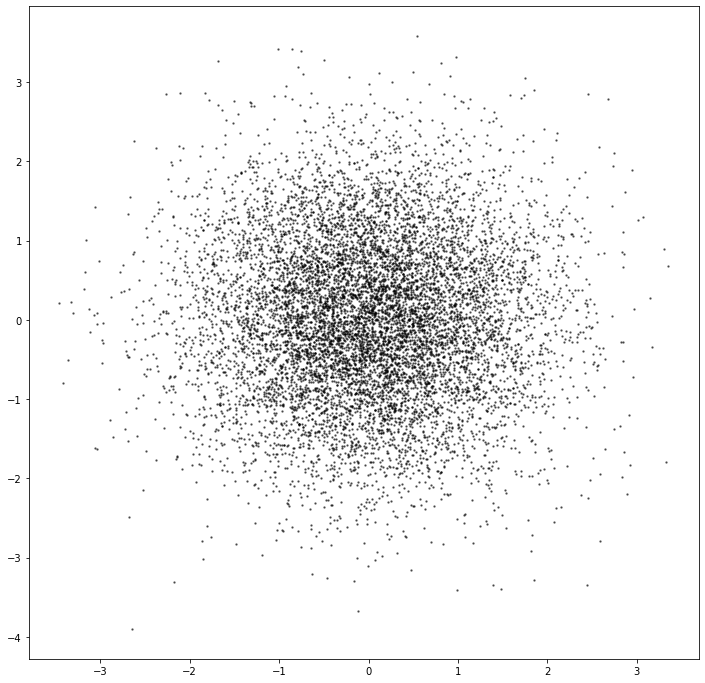

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for i in range(n_val_data):
    data, _ = next(val_data_flow)
    _, _, z = vae3.encoder.predict(data)
    ax.scatter(z[:,0], z[:,1], c='black', alpha=0.5, s=2)   

plt.show()

# Generate images from points in a 200-dimensional latent space.

## 200 次元の潜在空間内の点から画像を生成する。

In [28]:
# Generate 30 points in 200-dimensional latent space.
# 200次元の潜在空間の点を30個生成する。
import numpy as np

table_row = 10    # 表の横方向サイズ
table_line = 3   #表の縦方向サイズ

n_to_show = table_row * table_line

mat = np.array([ np.random.uniform(z_min[j], z_max[j], n_to_show) for j in range(z_dim)])
z_points = mat.transpose()

print(z_points.shape)

(30, 200)


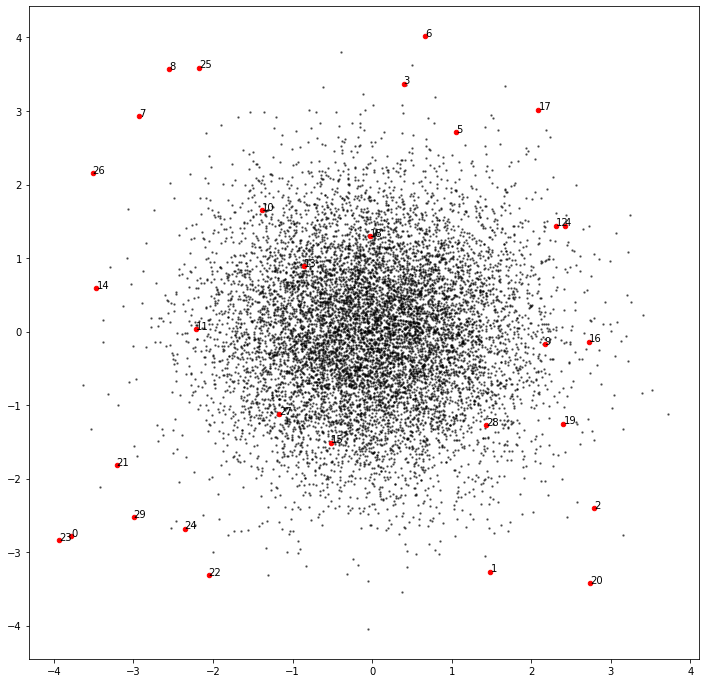

In [30]:
# Display 200-dimensional points on 2-dimensional space.
# 生成した200次元の点を2次元平面に表示する

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for i in range(n_val_data):
    data, _ = next(val_data_flow)
    _, _, z = vae3.encoder.predict(data)
    ax.scatter(z[:,0], z[:,1], c='black', alpha=0.5, s=2)

ax.scatter(z_points[:, 0], z_points[:, 1], c='red', alpha=1, s=20)
for i in range(len(z_points)):
    ax.text(z_points[i][0], z_points[i][1], str(i))

plt.show()

In [31]:
# Generate images from the points in 200-dimensional latent space.
# 200次元の潜在空間内の点から画像を生成する

reconst = vae3.decoder.predict(z_points)

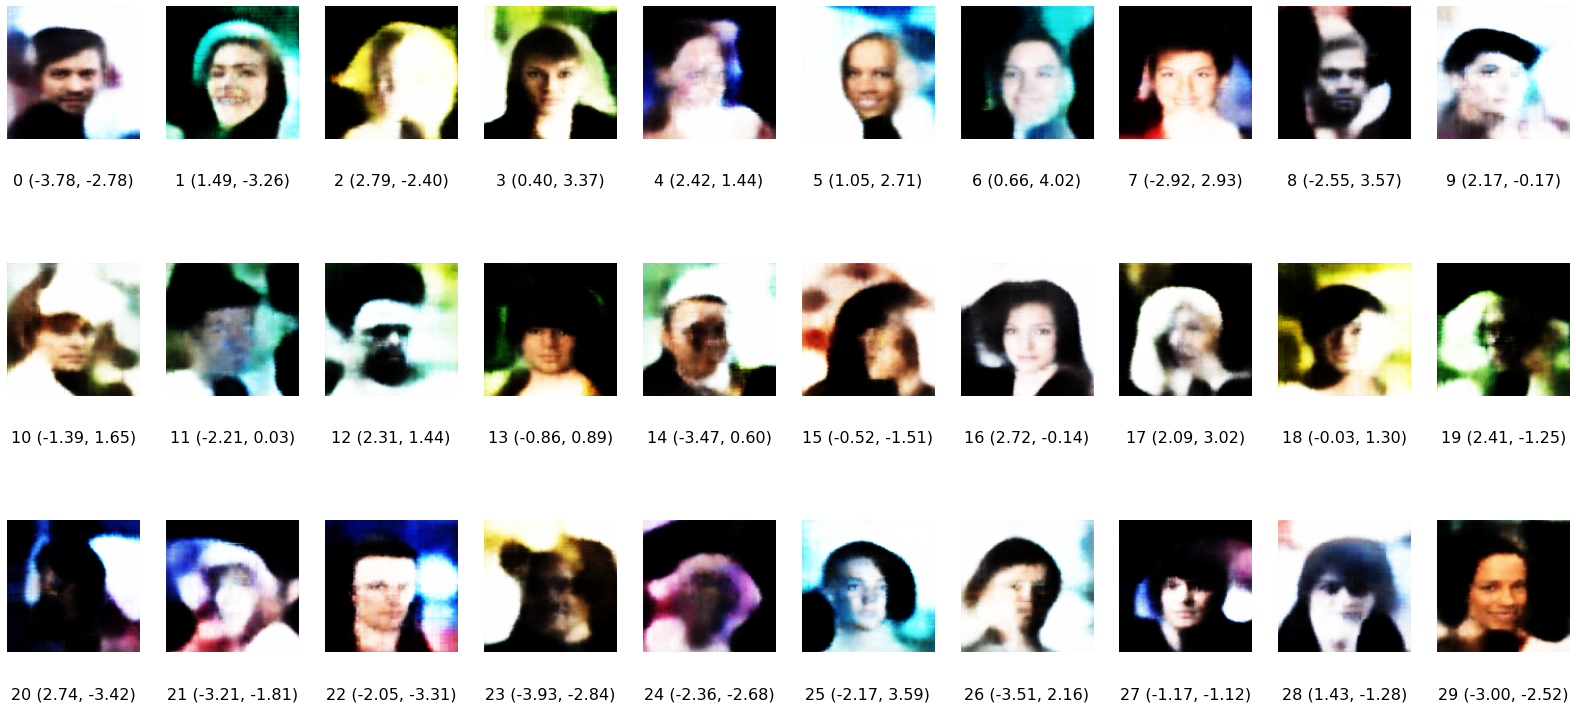

In [33]:
# Display generated images.
# 生成した画像を表示する
%matplotlib inline
import matplotlib.pyplot as plt

VSKIP=0.5   # vertical space between subplots

fig, ax = plt.subplots(table_line, table_row, figsize=(2.8 * table_row, 2.8 * table_line * (1+VSKIP)))
plt.subplots_adjust(hspace = VSKIP)
                       
for y in range(table_line):
    for x in range(table_row):
        idx = table_row * y + x
        img = reconst[idx].squeeze()
        ax[y][x].imshow(img, cmap='gray')
        ax[y][x].text(0.5, -0.35, f'{idx} ({z_points[idx][0]:.2f}, {z_points[idx][1]:.2f})', fontsize=16, ha='center', transform=ax[y][x].transAxes)
        ax[y][x].axis('off')
        
plt.show()

# Generate images by gradually changing the 0th to 19st dimensions of the 200 dimensionsw.

## 200次元のうち第0次元から第19次元までを少しずつ変更して、画像を生成する

In [35]:
z_mid = np.mean([z_min, z_max], axis=0)

In [36]:
print(z_mid.shape)

(200,)


In [37]:
n_grid = 20

x = np.linspace(z_min[0], z_max[0], n_grid)
y = np.linspace(z_min[1], z_max[1], n_grid)

xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()

z_points2 = np.zeros((xv.shape[0], z_dim))
print(z_points2.shape)
for i in range(z_points2.shape[0]):
    z_points2[i] = z_mid
    for j in range(20):
        z_points2[i,2*j+0] = xv[i]
        z_points2[i,2*j+1] = yv[i]

(400, 200)


In [38]:
reconst2 = vae3.decoder.predict(z_points2)

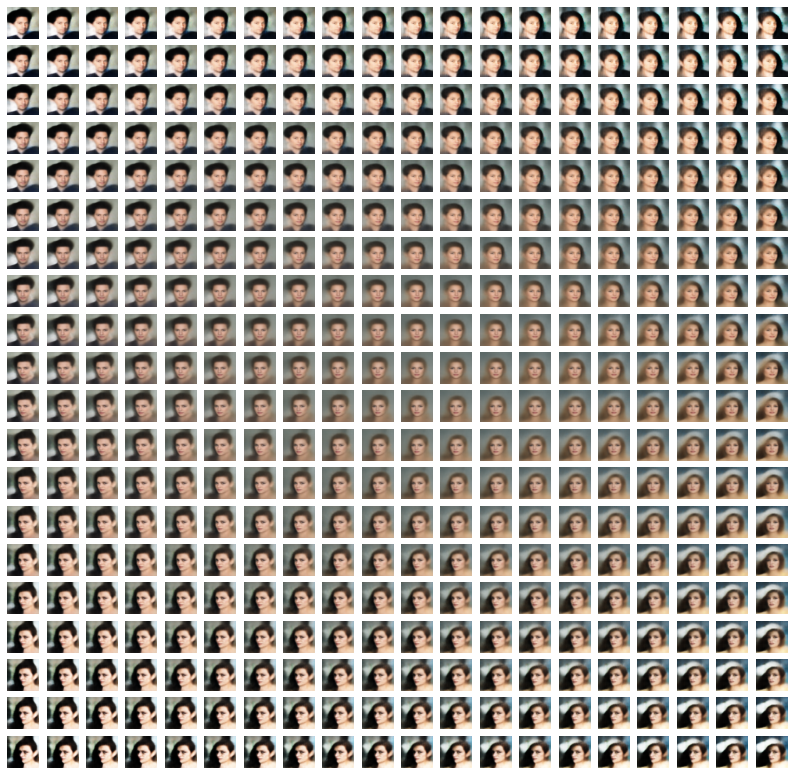

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(n_grid, n_grid, figsize=(0.7*n_grid, 0.7*n_grid))
for i in range(len(reconst2)):
    img = reconst2[i]
    line = i // n_grid
    row = i % n_grid
    ax[line][row].imshow(img)
    ax[line][row].axis('off')
    
plt.show()

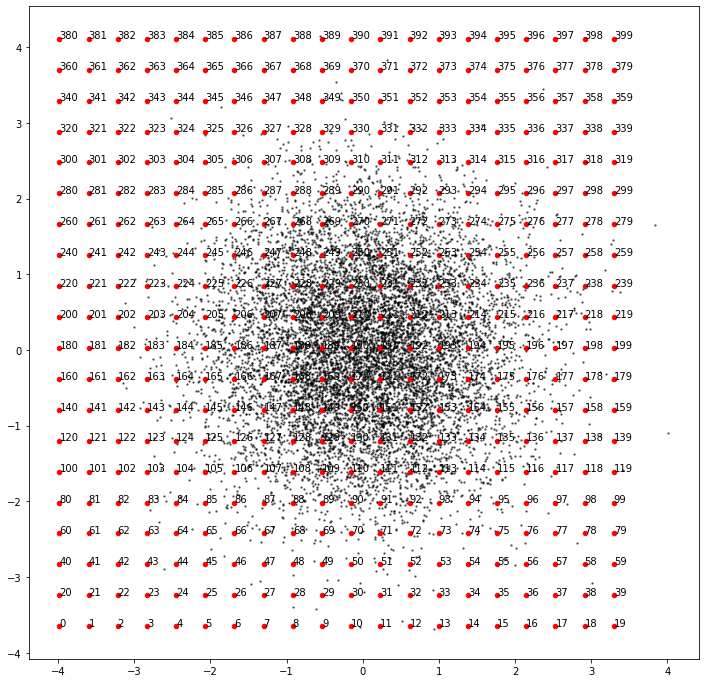

In [41]:
# Display 200-dimensional points on 2-dimensional space.
# 生成した200次元の点を2次元平面に表示する

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for i in range(n_val_data):
    data, _ = next(val_data_flow)
    _, _, z = vae3.encoder.predict(data)
    ax.scatter(z[:,0], z[:,1], c='black', alpha=0.5, s=2)

ax.scatter(z_points2[:, 0], z_points2[:, 1], c='red', alpha=1, s=20)
for i in range(len(z_points2)):
    ax.text(z_points2[i][0], z_points2[i][1], str(i))

plt.show()